In [1]:
with open("glass.dat", "r") as f:
    lines = f.readlines()[4:]

In [2]:
csm_vals = list()
vol_vals = list()
for line in lines:
    csm_indicator = line.split(",")[4].split(":")[0]
    vol_indicator = line.split(",")[5].split(":")[0]
    if "csm" in csm_indicator and "volume" in vol_indicator:
        csm_tmp = line.split(",")[4].split(":")[1]
        vol_tmp = line.split(",")[5].split(":")[1].strip().replace("}", "")
        if float(csm_tmp) < 15 and float(vol_tmp) < 25:
            csm_vals.append(float(csm_tmp))
            vol_vals.append(float(vol_tmp))

/opt/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(0, 2.5, '5'),
 Text(0, 5.0, '7'),
 Text(0, 7.5, '9'),
 Text(0, 10.0, '11'),
 Text(0, 12.5, '13'),
 Text(0, 15.0, '15'),
 Text(0, 17.5, '17'),
 Text(0, 20.0, '19'),
 Text(0, 22.5, '21'),
 Text(0, 25.0, '23')]

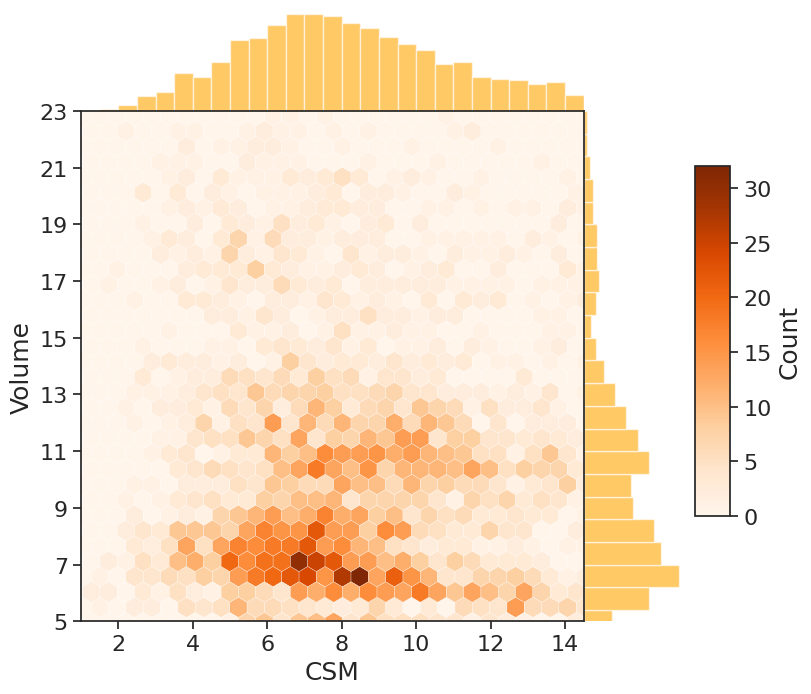

In [3]:
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import pandas as pd

li_env = pd.DataFrame(
    {
        'CSM': csm_vals,
         'Volume': vol_vals
    }
)

sns.set(style="ticks", color_codes=True)

g = sns.JointGrid(x="CSM", y="Volume", data=li_env, space=0, height=7, ratio=5)


def plot_joint_with_colorbar(x, y, **kwargs):
    ax = plt.gca()
    sc = ax.hexbin(x, y, **kwargs)
    cbar_ax = plt.gcf().add_axes([0.99, 0.25, 0.05, 0.5])
    cbar = plt.colorbar(sc, cax=cbar_ax)
    cbar.set_label('Count', fontsize=18)
    cbar.ax.tick_params(labelsize=16)

    
g = g.plot_joint(
    plot_joint_with_colorbar,
    gridsize=30,
    cmap="Oranges",
    edgecolors='white',
    linewidths=0.2
)
_ = g.ax_marg_x.hist(li_env["CSM"], color="orange", alpha=.6,
                     bins=np.arange(0, 16, 0.5))
_ = g.ax_marg_y.hist(li_env["Volume"], color="orange", alpha=.6,
                     orientation="horizontal",
                     bins=np.arange(0, 26, 1))
g.ax_marg_y.tick_params(labeltop=False, length=0)
# g.ax_marg_y.grid(True, axis='x', ls=':')
g.ax_marg_y.grid(False)
g.ax_marg_y.xaxis.set_major_locator(MaxNLocator(4))

g.ax_marg_x.tick_params(labelleft=False, length=0)
# g.ax_marg_x.grid(True, axis='y', ls=':')
g.ax_marg_x.grid(False)
g.ax_marg_x.yaxis.set_major_locator(MaxNLocator(4))

g.ax_joint.set_xlim([1, 14.5])
g.ax_joint.set_ylim([2.5, 25])
g.ax_joint.set_xlabel('CSM', fontsize=18)
g.ax_joint.set_xticklabels(range(0, 16, 2), fontsize=16)
g.ax_joint.set_ylabel('Volume', fontsize=18)
g.ax_joint.set_yticklabels(range(5, 25, 2), fontsize=16)

In [4]:
g.savefig("glass_csm_vol.png", dpi=300)